# Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings('ignore')

## =============================
## Linear Regression with One Variable
## =============================
### Part 1: Basic Function

In [2]:
def warmUpExercise():
    '''Example function in octave'''
    return np.eye(5)

In [3]:
print('5x5 Identiry Matrix: \n')
warmUpExercise()

5x5 Identiry Matrix: 



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Part 2: Plotting

In [4]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [5]:
def plotData(x, y):
    '''Plots the data points x and y into a new figure'''
    plt.figure()
    plt.scatter(x, y, c='red', marker='x', linewidth=1)
    plt.xlabel('Profit in $10,000s')
    plt.ylabel('Population of City in 10,000s')

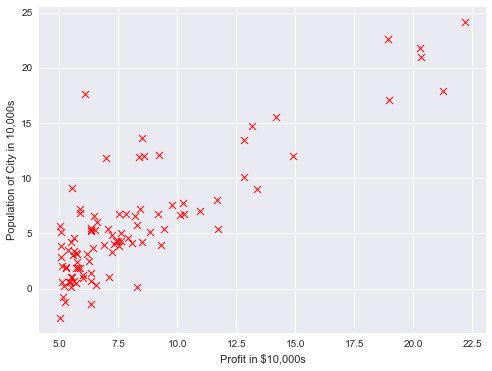

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

X = data[:, 0]
y = data[:, 1]
plotData(X, y)

### Part 3: Cost and Gradient Descent

In [7]:
m = len(y)
X = np.c_[np.ones((m, 1)), data[:, 0]]    # Add the a column of ones
y = y.reshape(-1, 1)                      # Reshape y to m*1 size
print(X.shape)
X[:5]

(97, 2)


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [8]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = .01

In [9]:
def computeCost(X, y, theta):
    '''Compute cost for linear regression'''
    theta = np.array(theta).reshape(2, 1)    # In case theta is given in a list
    return ((X @ theta - y).T @ (X @ theta - y) / 2 / len(y)).flatten()

In [10]:
J = computeCost(X, y, theta)
print('With theta = [0, 0] the cost J is: ', J[0])

theta = [-1, 2]
J = computeCost(X, y, theta)
print('With theta = [-1, 2] the cost J is: ', J[0])

With theta = [0, 0] the cost J is:  32.072733877455676
With theta = [-1, 2] the cost J is:  54.24245508201238


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''Implement gradient descent to compute the cost of one variable'''
    m = len(y)
    theta = np.array(theta).reshape(2, 1)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta1_new = theta[0] - X[:, 0].T @ (X @ theta - y) * alpha / m
        theta2_new = theta[1] - X[:, 1].T @ (X @ theta - y) * alpha / m
        theta = np.array([theta1_new, theta2_new]).reshape(2, 1)
        J_history[iter] = computeCost(X, y, theta)
    
    return theta.flatten()

In [12]:
theta = np.zeros((2, 1))
theta = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: ', theta)

Theta found by gradient descent:  [-3.63029144  1.16636235]


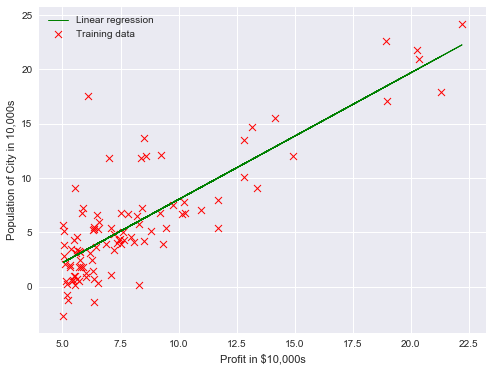

In [13]:
plt.figure()
plt.plot(X[:, 1], X @ theta, 'g-', linewidth=1)
plt.scatter(X[:, 1], y, c='red', marker='x', linewidth=1)
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.legend(['Linear regression', 'Training data'])
plt.show()

In [14]:
predict1 = [1, 3.5] @ theta
predict2 = [1, 7] @ theta
print('For population=35,000, we predict a profit of ', predict1*10000)
print('For population=70,000, we predict a profit of ', predict2*10000)

For population=35,000, we predict a profit of  4519.767867701772
For population=70,000, we predict a profit of  45342.45012944714


### Part 4: Visualizing J (theta_0,  theta_1)

In [15]:
theta0_vals = np.linspace(-40, 40, 200)
theta1_vals = np.linspace(-40, 40, 200)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i, j] = computeCost(X, y, [theta0_vals[i], theta1_vals[j]])

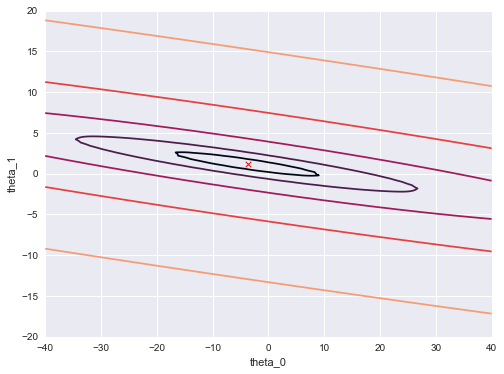

In [16]:
plt.figure()
plt.contour(theta0_vals, theta1_vals, np.log(J_vals.T))
plt.scatter(theta[0], theta[1], marker='x', c='r', s=30, linewidth=1)
plt.xlim(-40,40)
plt.ylim(-20,20)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

## =================================
## Linear Regression with Multiple Variables
## =================================
### Part 1: Feature Normalization

In [17]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
data[:5, :]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [18]:
m = len(data)
X = data[:, :2]
y = data[:, 2].reshape(m, 1)
print('First 10 examples from the dataset:\n')
for i, j in zip(X[:10], y[:10]):
    print('X = {}, y = {}'.format(i[0], j[0]))

First 10 examples from the dataset:

X = 2104.0, y = 399900.0
X = 1600.0, y = 329900.0
X = 2400.0, y = 369000.0
X = 1416.0, y = 232000.0
X = 3000.0, y = 539900.0
X = 1985.0, y = 299900.0
X = 1534.0, y = 314900.0
X = 1427.0, y = 198999.0
X = 1380.0, y = 212000.0
X = 1494.0, y = 242500.0


In [19]:
def featureNormalize(X):
    '''Normalizes the features in X '''
    return (X - X.mean(axis=0)) / X.std(axis=0, ddof=1), \
           X.mean(axis=0), \
           X.std(axis=0, ddof=1)

In [20]:
X, mu, sigma = featureNormalize(X)
X = np.c_[np.ones((m, 1)), X]
print('First 5 normalized X values are:\n', X[:5])

First 5 normalized X values are:
 [[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


### Part 2: Gradient Descent

In [21]:
def computeCostMulti(X, y, theta):
    '''Compute cost for linear regression with multiple variables'''
    num_col = X.shape[1]
    theta = np.array(theta).reshape(num_col, 1)
    return ((X @ theta - y).T @ (X @ theta - y) / (2 * X.shape[0])).flatten()

def gradientDescentMulti(X, y, theta, alpha, num_iters, threshold):
    '''Performs gradient descent to learn theta'''
    m = len(y)
    num_col = X.shape[1]
    theta = np.array(theta).reshape(num_col, 1)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta_new = np.zeros((num_col, 1))
        for i in range(num_col):
            theta_new[i] = theta[i] - (X[:, i].T @ (X @ theta - y)) * alpha / m
        theta = theta_new
        J = computeCostMulti(X, y, theta)
        if iter > 0:
            if J_history[iter-1] - J > threshold:
                if iter == num_iters - 1:
                    print('All iterations completed. Threshold not reached.')
            else:
                print('Output already meets the threshold.')
                break
        J_history[iter] = J      
    return theta.flatten(), J_history.flatten()

In [22]:
alpha = .01
num_iters = 400
theta = np.zeros((X.shape[1], 1))

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters, 0.0000001)

All iterations completed. Threshold not reached.


In [23]:
print('\nFirst 5 J values are: \n', J_history[:5])


First 5 J values are: 
 [6.43007496e+10 6.30367950e+10 6.17991118e+10 6.05871404e+10
 5.94003332e+10]


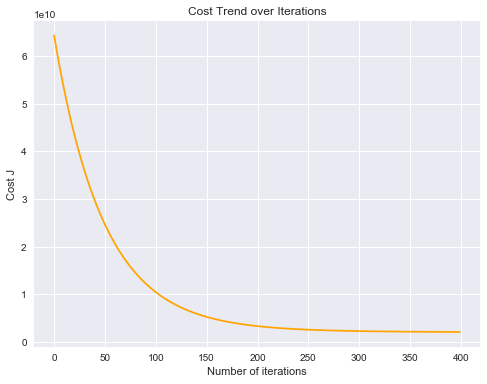

In [24]:
plt.figure()
plt.plot(range(num_iters), J_history, 'orange')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost Trend over Iterations')
plt.show()

In [25]:
print('Theta computed from gradient descent:\n', theta)

Theta computed from gradient descent:
 [334302.06399328 100087.11600585   3673.54845093]


In [26]:
price = theta[0] + (1650-mu[0])/sigma[0]*theta[1] + (3-mu[1])/sigma[1]*theta[2]
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent: \n', price)

Predicted price of a 1650 sq-ft, 3 br house using gradient descent: 
 289314.6203377763


### Part 3: Normal Equations

In [27]:
def normalEqn(X, y):
    '''Computes the closed-form solution to linear regression '''
    return (np.linalg.pinv(X.T @ X) @ X.T @ y).flatten()

In [28]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
m = len(data)
X = data[:, :2]
X = np.c_[np.ones((m, 1)), X]
y = data[:, 2].reshape(m, 1)
theta = normalEqn(X, y)

print('Theta computed from the normal equations: \n', theta)

Theta computed from the normal equations: 
 [89597.90954355   139.21067402 -8738.01911255]


In [29]:
price = theta[0] + theta[1] * 1650 + theta[2] * 3
print('Predicted price of a 1650 sq-ft, 3 br house using normal equation: \n', price)

Predicted price of a 1650 sq-ft, 3 br house using normal equation: 
 293081.464334972


**_Try Different Learning Rates_**

All iterations completed. Threshold not reached.


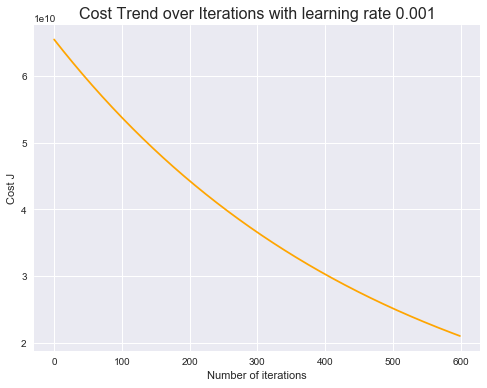



All iterations completed. Threshold not reached.


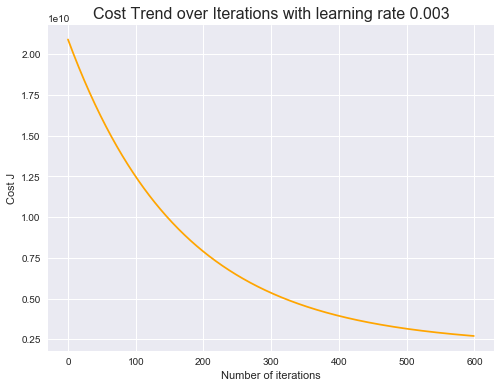



All iterations completed. Threshold not reached.


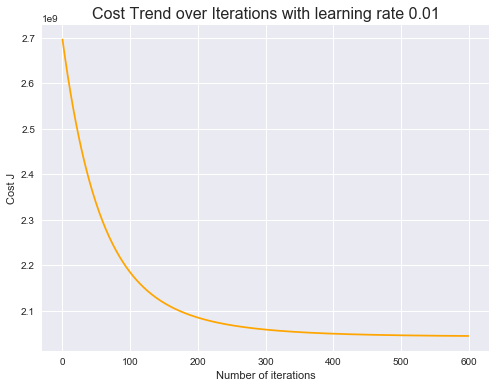



All iterations completed. Threshold not reached.


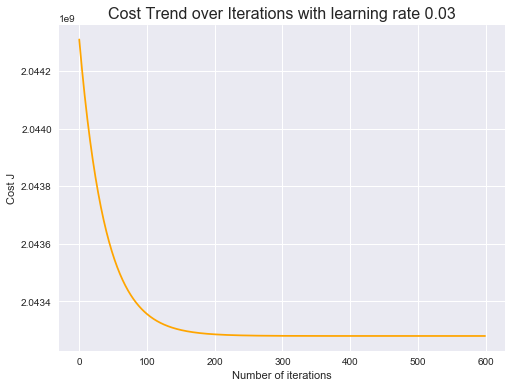



Output already meets the threshold.


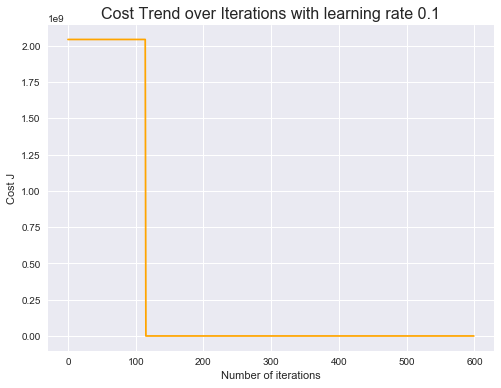



Output already meets the threshold.


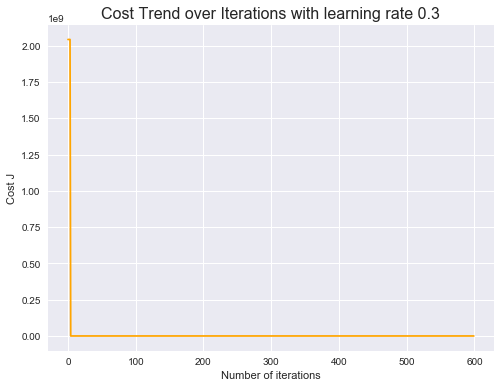

In [30]:
alpha = [.001, .003, .01, .03, .1, .3]
num_iters = 600
theta = np.zeros((X.shape[1], 1))
for al in alpha:
    X = data[:, :2]
    X, mu, sigma = featureNormalize(X)
    X = np.c_[np.ones((m, 1)), X]
    y = data[:, 2].reshape(m, 1)
    
    theta, J_history = gradientDescentMulti(X, y, theta, al, num_iters, 0.0000001)
    
    plt.figure()
    plt.plot(range(num_iters), J_history, 'orange')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Cost Trend over Iterations with learning rate {}'.format(al), fontsize=16)
    plt.show()
    print('\n')